# Final Project

# COURSE: Natural Language Processing 
##### Final Project: Classification of Social Media Post Content
##### SEMESTER: Spring 2 2022
##### NAME: Joe Cruz
##### DATE: 01May2022

#### This code was created to determine a classification model that can be used for the calssification of social media post content. Specifically, this code performs a brief exploratory analysis and preprocessing of social media post data and then uses the text data with content ('message') labels to generate and test a multitude of different classification models. A total of 21 different classification models were generated and tested. 

#### For further summary of the final project code, purpose, overiew, and challenges, view the supplementary "FinalProjectSummary_JBC_05May2022" file. 

In [1]:
#The following are the imports that will be used for this code.
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
import numpy as np
import regex as re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

### Dataset Source:  Crowdflower, Classification of Pol Social, Crowdflower: data.world,  inc.[Dataset]. 


#### Download the data from https://data.world/crowdflower/classification-of-pol-social and place into directory


In [2]:
#Places the dataset into a pandas dataframe.
original_doc = pd.read_csv('Political-media-DFE.csv',encoding='latin1')

In [3]:
#TEST: Prints out a random sampling of the dataframe object created. 
original_doc.sample(10, random_state = 5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
27,766192511,False,finalized,1,8/4/15 21:22,national,1.0000,partisan,1.0,attack,...,NaN,NaN,NaN,H001059,"<blockquote class=""twitter-tweet"" width=""450"">...",4.87652E+17,From: Randy Hultgren (Representative from Illi...,NaN,twitter,Remember Bill? He and his friends are stuck on...
1482,766193967,False,finalized,2,8/4/15 21:05,constituency,0.5165,neutral,1.0,personal,...,NaN,NaN,NaN,H000329,"<blockquote class=""twitter-tweet"" width=""450"">...",3.77801E+17,From: Doc Hastings (Representative from Washin...,NaN,twitter,I will join my colleagues on the steps of the ...
3021,766195507,False,finalized,1,8/5/15 5:14,national,1.0000,neutral,1.0,personal,...,NaN,NaN,NaN,D000191,"<div id=""fb-root""></div> <script>(function(d, ...",94324364811_10152890920049812,From: Peter DeFazio (Representative from Oregon),NaN,facebook,"It was a tense few weeks at the Capitol, but o..."
3867,766196353,False,finalized,1,8/5/15 5:44,national,1.0000,neutral,1.0,information,...,NaN,NaN,NaN,L000576,"<div id=""fb-root""></div> <script>(function(d, ...",139631049438354_652567814811339,From: Billy Long (Representative from Missouri),NaN,facebook,This morning the Judiciary Committee is holdin...
637,766193122,False,finalized,1,8/4/15 20:45,national,1.0000,neutral,1.0,personal,...,NaN,NaN,NaN,F000451,"<blockquote class=""twitter-tweet"" width=""450"">...",3.54658E+17,From: Michael Fitzpatrick (Representative from...,NaN,twitter,My opening remarks at today's @FinancialCmte h...
4191,766196677,False,finalized,1,8/5/15 5:09,national,1.0000,partisan,1.0,attack,...,NaN,NaN,NaN,P000096,"<div id=""fb-root""></div> <script>(function(d, ...",303312929155_10153003981959156,From: Bill Pascrell Jr. (Representative from N...,NaN,facebook,This morning I joined Democratic Whip Steny Ho...
3042,766195528,False,finalized,1,8/5/15 6:13,national,1.0000,neutral,1.0,policy,...,NaN,NaN,NaN,D000598,"<div id=""fb-root""></div> <script>(function(d, ...",103767526332478_745681068807784,From: Susan Davis (Representative from Califor...,NaN,facebook,Our students deserve a chance to achieve the A...
775,766193260,False,finalized,1,8/4/15 20:11,constituency,1.0000,neutral,1.0,personal,...,NaN,NaN,NaN,R000577,"<blockquote class=""twitter-tweet"" width=""450"">...",4.70997E+17,From: Tim Ryan (Representative from Ohio),NaN,twitter,Congratulations to @youngstownstate baseball f...
3767,766196253,False,finalized,1,8/5/15 5:15,national,1.0000,partisan,1.0,policy,...,NaN,NaN,NaN,L000263,"<div id=""fb-root""></div> <script>(function(d, ...",223726364320243_759237774102430,From: Sander Levin (Representative from Michigan),NaN,facebook,There are less than 50 days until the Health C...
3954,766196440,False,finalized,1,8/5/15 5:27,national,1.0000,partisan,1.0,policy,...,NaN,NaN,NaN,M001151,"<div id=""fb-root""></div> <script>(function(d, ...",105769762798552_652049924837197,From: Tim Murphy (Representative from Pennsylv...,NaN,facebook,The White House delayed certain Affordable Car...


In [4]:
#Creates dataframe object containing the message type from the posts and the text of each of the social media posts.
posts = pd.read_csv('Political-media-DFE.csv',encoding='latin1')[['message', 'text']]

In [5]:
#TEST: Prints out a random sampling of the dataframe object created. 
posts.sample(10, random_state = 5)

,message,text
27,attack,Remember Bill? He and his friends are stuck on...
1482,personal,I will join my colleagues on the steps of the ...
3021,personal,"It was a tense few weeks at the Capitol, but o..."
3867,information,This morning the Judiciary Committee is holdin...
637,personal,My opening remarks at today's @FinancialCmte h...
4191,attack,This morning I joined Democratic Whip Steny Ho...
3042,policy,Our students deserve a chance to achieve the A...
775,personal,Congratulations to @youngstownstate baseball f...
3767,policy,There are less than 50 days until the Health C...
3954,policy,The White House delayed certain Affordable Car...


In [6]:
#Cleans the text data

#Converts all text to lowercase.
posts['text'] = posts['text'].str.lower()

#Cleans text of special characters
posts['text'] = posts['text'].str.replace("-", " ")
posts['text'] = posts['text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

#Removes all forms of the Retweet command ('RT/rt')
posts['text'] = posts['text'].apply(lambda x: re.sub(r'\brt\b', '', x))
posts['text'] = posts['text'].apply(lambda x: re.sub(r'\bRT\b', '', x))

In [7]:
#Generates random sampling of the current pandas dataframe containing the cleaned text data.
posts.sample(10, random_state = 5)

,message,text
27,attack,remember bill he and his friends are stuck on ...
1482,personal,i will join my colleagues on the steps of the ...
3021,personal,it was a tense few weeks at the capitol but on...
3867,information,this morning the judiciary committee is holdin...
637,personal,my opening remarks at today's financialcmte he...
4191,attack,this morning i joined democratic whip steny ho...
3042,policy,our students deserve a chance to achieve the a...
775,personal,congratulations to youngstownstate baseball fo...
3767,policy,there are less than 50 days until the health c...
3954,policy,the white house delayed certain affordable car...


In [8]:
#Tokenized text and added the tokens in a new column on the dataframe
posts['tokenized_text'] = posts['text'].apply(word_tokenize)

#TEST: Prints sampling of current state of the dataframe (text tokenized)
posts.sample(10, random_state = 5)

,message,text,tokenized_text
27,attack,remember bill he and his friends are stuck on ...,"[remember, bill, he, and, his, friends, are, s..."
1482,personal,i will join my colleagues on the steps of the ...,"[i, will, join, my, colleagues, on, the, steps..."
3021,personal,it was a tense few weeks at the capitol but on...,"[it, was, a, tense, few, weeks, at, the, capit..."
3867,information,this morning the judiciary committee is holdin...,"[this, morning, the, judiciary, committee, is,..."
637,personal,my opening remarks at today's financialcmte he...,"[my, opening, remarks, at, today, 's, financia..."
4191,attack,this morning i joined democratic whip steny ho...,"[this, morning, i, joined, democratic, whip, s..."
3042,policy,our students deserve a chance to achieve the a...,"[our, students, deserve, a, chance, to, achiev..."
775,personal,congratulations to youngstownstate baseball fo...,"[congratulations, to, youngstownstate, basebal..."
3767,policy,there are less than 50 days until the health c...,"[there, are, less, than, 50, days, until, the,..."
3954,policy,the white house delayed certain affordable car...,"[the, white, house, delayed, certain, affordab..."


In [9]:
#Checks for POS tags in a random sampling of the overall corpus. 
tagged_text = []
tagged = []

#Performs POS Tagging of random sampling and appends to the tagged_text list
for word in posts['tokenized_text'].sample(10, random_state = 5):
    tagged_word = nltk.pos_tag(word)
    
    #TEST: Prints the tag of the word
    #print(tagged_word)
    
    tagged_text.append(tagged_word)

# USED FOR PROPER FORMAT FOR VISUALIZER
tagged.append(tagged_text)

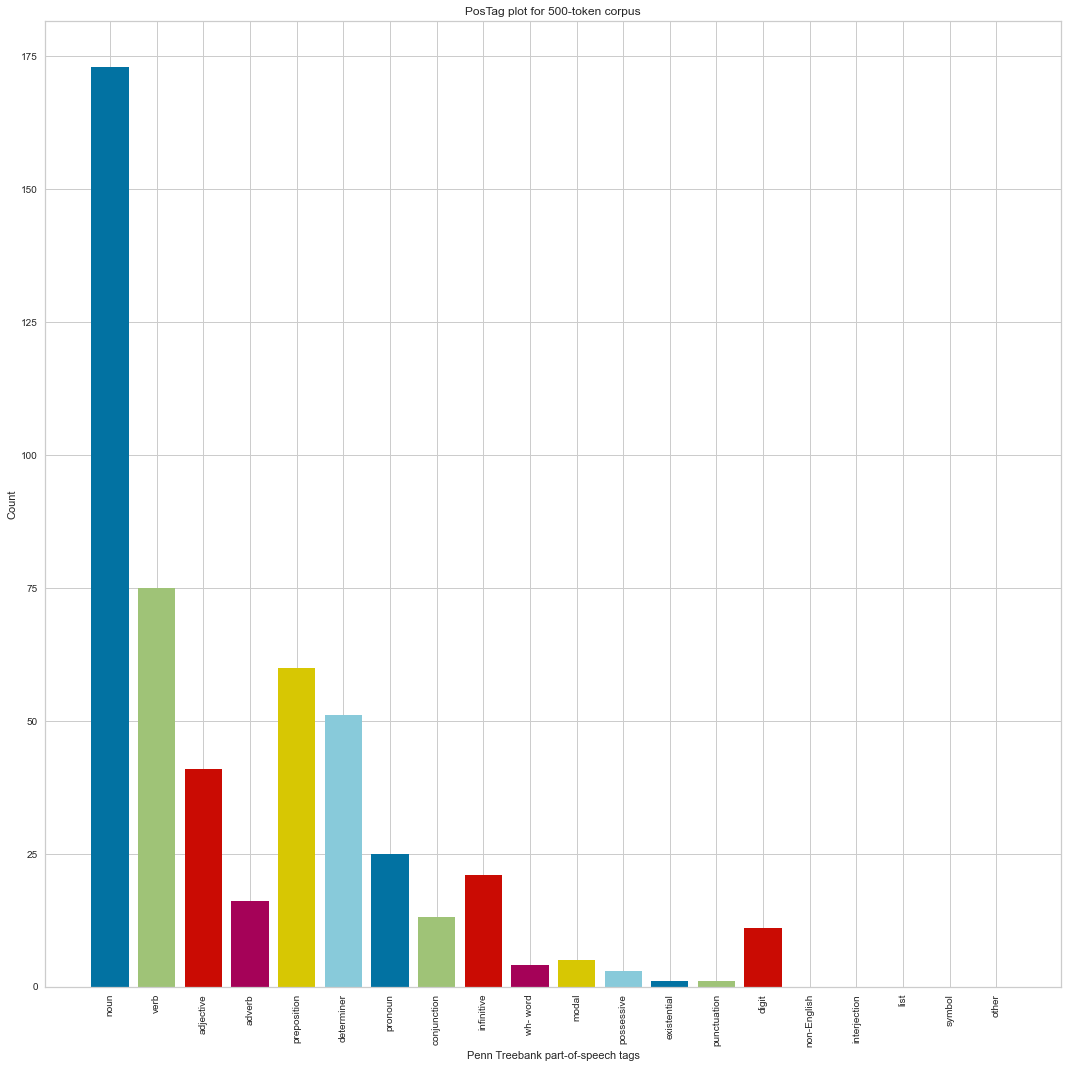

<AxesSubplot:title={'center':'PosTag plot for 500-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [10]:
#Visualizes the POS tags for the sample. 
from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()

In [11]:
#Sets stop words to remove in the tokenized text
stop_words = set(stopwords.words('english'))

#Removes stop words from the tokenized text.
posts['tokenized_text'] = posts['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

#TEST: Prints sampling of current state of the dataframe (stop words removed from tokens)
posts.sample(10, random_state = 5)

,message,text,tokenized_text
27,attack,remember bill he and his friends are stuck on ...,"[remember, bill, friends, stuck, senatorreid, ..."
1482,personal,i will join my colleagues on the steps of the ...,"[join, colleagues, steps, capitol, morning, ho..."
3021,personal,it was a tense few weeks at the capitol but on...,"[tense, weeks, capitol, one, thing, always, li..."
3867,information,this morning the judiciary committee is holdin...,"[morning, judiciary, committee, holding, heari..."
637,personal,my opening remarks at today's financialcmte he...,"[opening, remarks, today, 's, financialcmte, h..."
4191,attack,this morning i joined democratic whip steny ho...,"[morning, joined, democratic, whip, steny, hoy..."
3042,policy,our students deserve a chance to achieve the a...,"[students, deserve, chance, achieve, america, ..."
775,personal,congratulations to youngstownstate baseball fo...,"[congratulations, youngstownstate, baseball, w..."
3767,policy,there are less than 50 days until the health c...,"[less, 50, days, health, care, marketplaces, e..."
3954,policy,the white house delayed certain affordable car...,"[white, house, delayed, certain, affordable, c..."


In [12]:
#Meant to check success of removal of stop words from the corpus.
#Checks for POS tags in a random sampling of the overall corpus. 
tagged_text = []
tagged = []

#Performs POS Tagging of random sampling and appends to the tagged_text list
for word in posts['tokenized_text'].sample(10, random_state = 5):
    tagged_word = nltk.pos_tag(word)
    
    #TEST: Prints the tag of the word
    #print(tagged_word)
    
    tagged_text.append(tagged_word)

# USED FOR PROPER FORMAT FOR VISUALIZER
tagged.append(tagged_text)

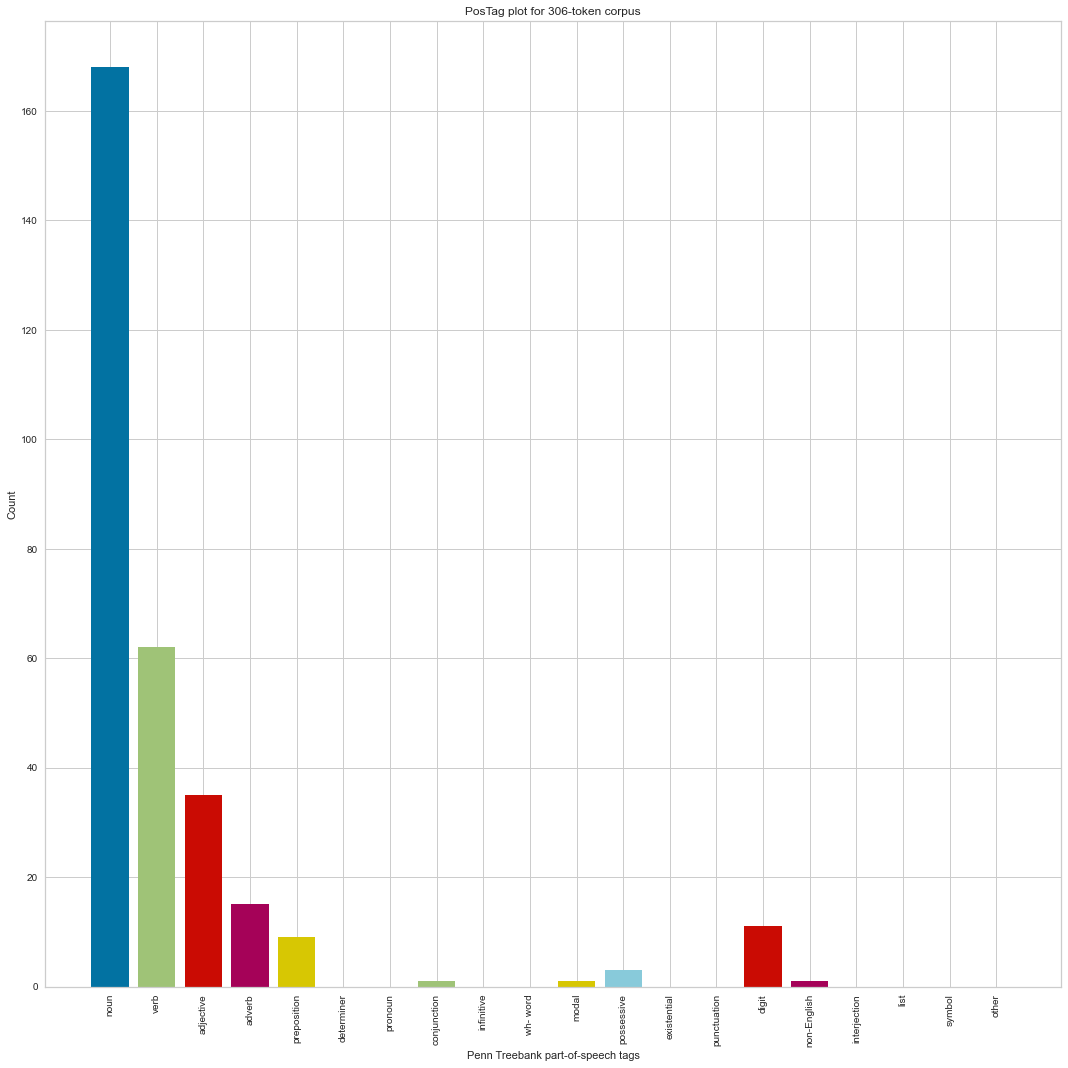

<AxesSubplot:title={'center':'PosTag plot for 306-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [13]:
#Meant to check success of removal of stop words from the corpus.
#Visualizes the POS tags for the sample. 
from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()

In [14]:
#Rejoins the tokenized text after stopwords removed and adds to new column in the dataframe.
posts['text_no_stopwords'] = [' '.join(map(str, l)) for l in posts['tokenized_text']]

#TEST: Prints sampling of current state of the dataframe (rejoined stopword-less tokens)
posts.sample(10, random_state = 5)

,message,text,tokenized_text,text_no_stopwords
27,attack,remember bill he and his friends are stuck on ...,"[remember, bill, friends, stuck, senatorreid, ...",remember bill friends stuck senatorreid 's des...
1482,personal,i will join my colleagues on the steps of the ...,"[join, colleagues, steps, capitol, morning, ho...",join colleagues steps capitol morning honor tw...
3021,personal,it was a tense few weeks at the capitol but on...,"[tense, weeks, capitol, one, thing, always, li...",tense weeks capitol one thing always lightens ...
3867,information,this morning the judiciary committee is holdin...,"[morning, judiciary, committee, holding, heari...",morning judiciary committee holding hearing ti...
637,personal,my opening remarks at today's financialcmte he...,"[opening, remarks, today, 's, financialcmte, h...",opening remarks today 's financialcmte hearing...
4191,attack,this morning i joined democratic whip steny ho...,"[morning, joined, democratic, whip, steny, hoy...",morning joined democratic whip steny hoyer pre...
3042,policy,our students deserve a chance to achieve the a...,"[students, deserve, chance, achieve, america, ...",students deserve chance achieve america dream ...
775,personal,congratulations to youngstownstate baseball fo...,"[congratulations, youngstownstate, baseball, w...",congratulations youngstownstate baseball winni...
3767,policy,there are less than 50 days until the health c...,"[less, 50, days, health, care, marketplaces, e...",less 50 days health care marketplaces exchange...
3954,policy,the white house delayed certain affordable car...,"[white, house, delayed, certain, affordable, c...",white house delayed certain affordable care ac...


<AxesSubplot:xlabel='message', ylabel='count'>

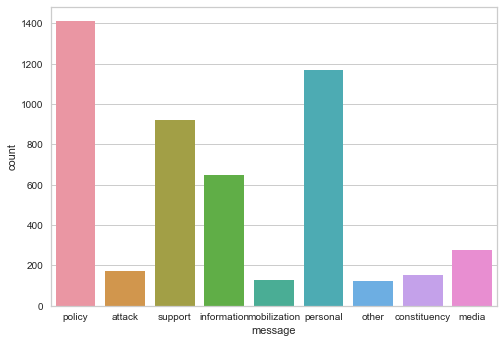

In [15]:
#Visualizes the classes with counts. For this data is seen that there are many more policy, personal, and support class 
#instances than any of the other classes
sns.countplot(x = posts["message"])

## BOW Models

### Vector Configuration Used: Bag-of-Words (BOW)/Unigrams 

In [16]:
#Assigns the y and the X1 values. The y value is the message type labels and the X1 is the text associated with the labels.
#The X1 value will be used to create the BOW vector.
y = posts.message
X1 = posts.text_no_stopwords

In [17]:
#Takes in the import for the CountVectorizer to generate the BOW model
from sklearn.feature_extraction.text import CountVectorizer

#Instatiates the count vectorizer
count_vectorizer = CountVectorizer()

#Fits the count vectorizer to the data
X = count_vectorizer.fit_transform(X1)

In [18]:
#Imports the training/testing split command to split data into training and testing sets.
from sklearn.model_selection import train_test_split

#TEST: Splits the whole dataset into a training validation set of x and y trainers as well as a test sample for validation
#This uses random state 1 will only be used for the creation/modification of models for improvement.
#X_train_val, X_val, y_train_val, y_val = train_test_split(X, y, test_size = 0.2, random_state=1)


#Splits the dataset into training and testing samples for the models.This uses random state 5, which is a different set 
#of test samples for the model to be trained on and tested. (80% train/20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

### Multinomial Naive Bayes: BOW 

In [19]:
#Imports the Multinomial Naive Bayes classifier model. 
from sklearn.naive_bayes import MultinomialNB

#THE FOLLOWING 4 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY
#TEST: Training/testing of model using validation train/test sets
#clf_nb = MultinomialNB()
#clf_nb.fit(X_train_val, y_train_val)
#y_predict_nb = clf_nb.predict(X_val)

#Prints the Accuracy of the validation training and testing sets for the Multinomial Naive Bayes classifier model.
#print('Accuracy of Multinomial NB classifier on training set: {:.2f}'.format(clf_nb.score(X_train_val, y_train_val)))
#print('Accuracy of Multinomial NB classifier on test set: {:.2f}'.format(clf_nb.score(X_val, y_val)))

#Generates the confusion matrix of the validation test for the model and the classification accuracy
#clf_nb  = metrics.confusion_matrix(y_val, y_predict_nb)
#score_nb =accuracy_score(y_val,y_predict_nb)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Multinomial Naive Bayes Classifier:\n", clf_nb)
#print("\nAccuracy of Multinomial Naive Bayes Classifier: ", score_nb)
#print("\nClassification Report for Multinomial Naive Bayes Classifier: \n", classification_report(y_val, y_predict_nb, zero_division=0))


# Instantiates the Multinomial Naive Bayes classifier model.
clf_nb = MultinomialNB()

#Trains the model using the generated training data
clf_nb.fit(X_train, y_train)

#Performs a prediction of the X_test data using the trained Multinomial Naive Bayes classifier model.
y_predict_nb = clf_nb.predict(X_test)

#Prints the Accuracy of the training and testing sets for the Multinomial Naive Bayes classifier model.
print('Accuracy of NB  classifier on training set: {:.2f}'.format(clf_nb.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'.format(clf_nb.score(X_test, y_test)))

#Generates the confusion matrix for the Multinomial Naive Bayes classifier model. 
clf_nb  = metrics.confusion_matrix(y_test, y_predict_nb)
score_nb =accuracy_score(y_test,y_predict_nb)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Multinomial Naive Bayes Classifier:\n", clf_nb)
print("\nAccuracy of Multinomial Naive Bayes Classifier: ", score_nb)
print("\nClassification Report for Multinomial Naive Bayes Classifier: \n", classification_report(y_test, y_predict_nb, zero_division=0))

Accuracy of NB  classifier on training set: 0.75
Accuracy of NB classifier on test set: 0.41

Confusion Matrix for Multinomial Naive Bayes Classifier:
 [[  0   0   0   1   0   0   1  27   2]
 [  0   0   1   0   0   0  20   4   3]
 [  1   0  10   4   0   0  46  65  13]
 [  0   0   4  10   0   0  15  14   5]
 [  1   0   0   0   0   0  11  12   5]
 [  0   0   0   1   0   1   8   6   3]
 [  0   0  13   3   0   0 140  60  31]
 [  0   0   7   7   0   1  26 223  25]
 [  0   0   4   4   0   0  55  81  26]]

Accuracy of Multinomial Naive Bayes Classifier:  0.41

Classification Report for Multinomial Naive Bayes Classifier: 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.26      0.07      0.11       139
       media       0.33      0.21      0.26        48
mobilization       0.00      0.00      0.00        29
       other       0.50      0.05      0.10        

### Logistic Regression: BOW 

In [20]:
#Imports the Logistic Regression model
from sklearn.linear_model import LogisticRegression

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Trains the Logistic Regression model with the validation training data
#clf_lr = LogisticRegression(class_weight='balanced', random_state=1, max_iter=300).fit(X_train_val, y_train_val)

#TEST:Predicts the X_validation data using the newly trained Logisitic Regression model.
#y_predict_lr = clf_lr.predict(X_val)

#Prints the Accuracy of the validation training and testing sets for the Logistic Regression classifier model.
#print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'.format(clf_lr.score(X_train_val, y_train_val)))
#print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(clf_lr.score(X_val, y_val)))
#print()

#TEST:Generates the confusion matrix of the validation test for the model and the classification accuracy
#cm_lr  = metrics.confusion_matrix(y_val, y_predict_lr)
#score_lr =accuracy_score(y_val,y_predict_lr)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Logistic Regression Classifier:\n", cm_lr)
#print("\nAccuracy of Logistic Regression Classifier: ", score_lr)
#print("\nClassification Report for Logistic Regression Classifier: \n", classification_report(y_val, y_predict_lr, zero_division=0))


#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Trains the Logistic Regression model with the training data
clf_lr = LogisticRegression(class_weight='balanced', random_state=1, max_iter=300).fit(X_train, y_train)

#Predicts the X_testing data using the newly trained Logisitic Regression model.
y_predict_lr = clf_lr.predict(X_test)

#Prints the Accuracy of the training and testing sets for the Logistic Regression classifier model.
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'.format(clf_lr.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(clf_lr.score(X_test, y_test)))
print()

#Generates the confusion matrix of the test for the model and the classification accuracy
cm_lr  = metrics.confusion_matrix(y_test, y_predict_lr)
score_lr =accuracy_score(y_test,y_predict_lr)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Logistic Regression Classifier:\n", cm_lr)
print("\nAccuracy of Logistic Regression Classifier: ", score_lr) 
print("\nClassification Report for Logistic Regression Classifier: \n", classification_report(y_test, y_predict_lr, zero_division=0))


Accuracy of Logistic Regression Classifier on training set: 0.98
Accuracy of Logistic Regression Classifier on test set: 0.33


Confusion Matrix for Logistic Regression Classifier:
 [[  5   0   1   3   1   1   1  17   2]
 [  0   3   2   1   0   0  14   4   4]
 [  2   3  15   9   6   1  47  41  15]
 [  0   0   7  20   1   0   8   7   5]
 [  0   0   3   1   4   0   5   8   8]
 [  0   0   3   0   1   1   7   2   5]
 [  2   1  21   9   3   1 121  38  51]
 [ 14   2  30  15   9   3  32 129  55]
 [  2   2  19   7   3   3  55  46  33]]

Accuracy of Logistic Regression Classifier:  0.331

Classification Report for Logistic Regression Classifier: 
               precision    recall  f1-score   support

      attack       0.20      0.16      0.18        31
constituency       0.27      0.11      0.15        28
 information       0.15      0.11      0.12       139
       media       0.31      0.42      0.35        48
mobilization       0.14      0.14      0.14        29
       other       0.10     

### Multi-Layer Perceptron (MLP): BOW

In [21]:
#Imports the Multi-layer Perceptron (MLP) Classifier
from sklearn.neural_network import MLPClassifier

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Trains the model with the validation training data
#clf_nn = MLPClassifier(solver='sgd', alpha=1e-2,learning_rate = 'adaptive',max_iter=10000, hidden_layer_sizes=(10, 5), random_state=1).fit(X_train_val, y_train_val)

#Predicts the X_val data using the newly trained Multi-layer Perceptron (MLP) Classifier model.
#y_predict_nn = clf_nn.predict(X_val)

#Prints the Accuracy of the training and testing sets for the Multi-layer Perceptron (MLP) Classifier model.
#print('Accuracy of Multi-layer Perceptron (MLP) Classifier on training set: {:.2f}'.format(clf_nn.score(X_train_val, y_train_val)))
#print('Accuracy of Multi-layer Perceptron (MLP) Classifier on test set: {:.2f}'.format(clf_nn.score(X_val, y_val)))
#print()

#TEST:Generates the confusion matrix of the validation test for the model and the classification accuracy
#cm_nn  = metrics.confusion_matrix(y_val, y_predict_nn)
#score_nn =accuracy_score(y_val,y_predict_nn)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Multi-layer Perceptron (MLP) Classifier:\n", cm_nn)
#print("\nAccuracy of Multi-layer Perceptron (MLP) Classifier: ", score_nn)
#print("\nClassification Report for Multi-layer Perceptron (MLP) Classifier: \n", classification_report(y_val, y_predict_nn,zero_division=0))


#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Trains the model with the training data
clf_nn = MLPClassifier(solver='sgd', alpha=1e-2,learning_rate = 'adaptive',max_iter=10000, hidden_layer_sizes=(10, 5), random_state=1).fit(X_train, y_train)

#Predicts the X_testing data using the newly trained Multi-layer Perceptron (MLP) Classifier model.
y_predict_nn = clf_nn.predict(X_test)

#Prints the Accuracy of the training and testing sets for the Multi-layer Perceptron (MLP) Classifier model.
print('Accuracy of Multi-layer Perceptron (MLP) Classifier on training set: {:.2f}'.format(clf_nn.score(X_train, y_train)))
print('Accuracy of Multi-layer Perceptron (MLP) Classifier on test set: {:.2f}'.format(clf_nn.score(X_test, y_test)))
print()

#Generates the confusion matrix of the validation test for the model and the classification accuracy
cm_nn  = metrics.confusion_matrix(y_test, y_predict_nn)
score_nn =accuracy_score(y_test,y_predict_nn)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Multi-layer Perceptron (MLP) Classifier:\n", cm_nn)
print("\nAccuracy of Multi-layer Perceptron (MLP) Classifier: ", score_nn)
print("\nClassification Report for Multi-layer Perceptron (MLP) Classifier: \n", classification_report(y_test, y_predict_nn, zero_division=0))

Accuracy of Multi-layer Perceptron (MLP) Classifier on training set: 0.99
Accuracy of Multi-layer Perceptron (MLP) Classifier on test set: 0.33


Confusion Matrix for Multi-layer Perceptron (MLP) Classifier:
 [[  3   0   2   1   1   4   2  17   1]
 [  0   1   2   1   0   1  15   6   2]
 [  2   0  10   6   3   7  40  56  15]
 [  0   1   6  14   0   1  10  12   4]
 [  1   1   3   0   2   2   5  10   5]
 [  0   0   1   0   0   2   8   5   3]
 [  2   0  14   6   2  14 110  56  43]
 [ 11   1  15   8   4  17  31 152  50]
 [  2   1  19   3   0   4  44  63  34]]

Accuracy of Multi-layer Perceptron (MLP) Classifier:  0.328

Classification Report for Multi-layer Perceptron (MLP) Classifier: 
               precision    recall  f1-score   support

      attack       0.14      0.10      0.12        31
constituency       0.20      0.04      0.06        28
 information       0.14      0.07      0.09       139
       media       0.36      0.29      0.32        48
mobilization       0.17      0.07    

### Random Forest: BOW 

In [22]:
# Imports the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#Creates and trains the Random Forest Classifier
#clf_rf = RandomForestClassifier(n_estimators=50)
#clf_rf = clf_rf.fit(X_train_val, y_train_val)

#Performs prediction of the test data using the Random Forest Classifier
#y_predict_rf = clf_rf.predict(X_val)

#Prints out the accuracy of the classifier on the training data and the testing data
#print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(clf_rf.score(X_train_val, y_train_val)))
#print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf_rf.score(X_val, y_val)))
#print()

#Generates the confusion matrix of the test for the model and the classification accuracy
#cm_rf = metrics.confusion_matrix(y_val, y_predict_rf)
#score_rf = accuracy_score(y_val,y_predict_rf)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Random Forest classifier:\n", cm_rf)
#print("\nAccuracy of Random Forest classifier: ", score_rf) 
#print("\nClassification Report for Random Forest classifier: \n", classification_report(y_val, y_predict_rf, zero_division=0))


#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Creates and trains the Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=10)
clf_rf = clf_rf.fit(X_train, y_train)

#Performs prediction of the test data using the Random Forest Classifier
y_predict_rf = clf_rf.predict(X_test)


#Prints out the accuracy of the classifier on the training data and the testing data
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(clf_rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf_rf.score(X_test, y_test)))
print()

#Generates the confusion matrix of the test for the model and the classification accuracy
cm_rf = metrics.confusion_matrix(y_test, y_predict_rf)
score_rf = accuracy_score(y_test,y_predict_rf)


#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Random Forest classifier:\n", cm_rf)
print("\nAccuracy of Random Forest classifier: ", score_rf) 
print("\nClassification Report for Random Forest classifier: \n", classification_report(y_test, y_predict_rf, zero_division=0))


Accuracy of Random Forest classifier on training set: 0.98
Accuracy of Random Forest classifier on test set: 0.37


Confusion Matrix for Random Forest classifier:
 [[  2   0   1   2   1   0   4  18   3]
 [  0   1   0   0   0   0  19   6   2]
 [  1   0  12   3   2   1  42  69   9]
 [  0   0   0  11   0   0  21  15   1]
 [  0   0   4   1   0   0   8  14   2]
 [  0   1   3   0   0   0   6   7   2]
 [  1   1  10  11   0   1 135  64  24]
 [  6   0  13   9   1   1  42 188  29]
 [  0   3   9   6   1   0  56  77  18]]

Accuracy of Random Forest classifier:  0.367

Classification Report for Random Forest classifier: 
               precision    recall  f1-score   support

      attack       0.20      0.06      0.10        31
constituency       0.17      0.04      0.06        28
 information       0.23      0.09      0.13       139
       media       0.26      0.23      0.24        48
mobilization       0.00      0.00      0.00        29
       other       0.00      0.00      0.00        19
    

### Ensemble Model (Soft Voting/Majority Rule(NB, LR)): BOW 

In [23]:
#Imports the Soft Voting/Majority Rule classifier
from sklearn.ensemble import VotingClassifier

#Instantiates the Multinomial Naive Bayes Classifier
nb = MultinomialNB()

#Instantiates the Logistic Regression Classifier
lr = LogisticRegression(class_weight='balanced', random_state=1)

#Creates the Soft Voting/Majority Rule classifier using the Multinomial Naive Bayes and Logistic Regression 
eclf = VotingClassifier(estimators=[('nb', nb), ('lr', lr)], voting ='soft', weights=[1, 1])

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Trains the Soft Voting/Majority Rule Classifier with the validation training data
#eclf = eclf.fit(X_train_val, y_train_val)

#TEST:Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
#y_predict_ec = eclf.predict(X_val)

#TEST:Prints the Accuracy of the training and testing sets for the Soft Voting/Majority Rule Classifier model.
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on training set: {:.2f}'.format(eclf.score(X_train_val, y_train_val)))
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on test set: {:.2f}'.format(eclf.score(X_val, y_val)))
#print()

#TEST:Generates the confusion matrix of the validation test for the model and the classification accuracy
#cm_ECLF  = metrics.confusion_matrix(y_val, y_predict_ec)
#score_ECLF =accuracy_score(y_val,y_predict_ec)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR):\n", cm_ECLF)
#print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, LR): ", score_ECLF)
#print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, LR): \n", classification_report(y_test, y_predict_ec, zero_division=0))


#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Trains the Soft Voting/Majority Rule Classifier with the training data
eclf = eclf.fit(X_train, y_train)

#Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
y_predict_ec = eclf.predict(X_test)

#Prints the Accuracy of the training and testing sets for the Soft Voting/Majority Rule Classifier model.
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on training set: {:.2f}'.format(eclf.score(X_train, y_train)))
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on test set: {:.2f}'.format(eclf.score(X_test, y_test)))
print()

#Generates the confusion matrix of the validation test for the model and the classification accuracy
cm_ECLF = metrics.confusion_matrix(y_test, y_predict_ec)
score_ECLF =accuracy_score(y_test,y_predict_ec)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR):\n", cm_ECLF)
print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, LR): ", score_ECLF)
print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, LR): \n", classification_report(y_test, y_predict_ec, zero_division=0))



Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on training set: 0.84
Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on test set: 0.41


Confusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR):
 [[  0   0   0   1   0   0   1  28   1]
 [  0   0   0   0   0   0  18   5   5]
 [  1   0  11   4   1   0  47  62  13]
 [  0   0   3  14   0   0  12  14   5]
 [  1   0   1   0   0   0  10  11   6]
 [  0   0   0   1   0   1   8   7   2]
 [  0   0  11   4   0   0 140  55  37]
 [  0   0  10   7   0   1  26 216  29]
 [  0   0   6   4   0   1  57  74  28]]

Accuracy of Soft Voting/Majority Rule Classifier (NB, LR):  0.41

Classification Report for Soft Voting/Majority Rule Classifier (NB, LR): 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.26      0.08      0.12       139
       media       0.40      0.29      0.34        48
mobiliza

### Ensemble Model (Soft Voting/Majority Rule(NB, MLP)): BOW 

In [24]:
### TAKES LONG TIME TO RUN (~7 min)

#Instantiates the MLP Classifier
mlp= MLPClassifier(solver='sgd', alpha=1e-2,learning_rate = 'adaptive', hidden_layer_sizes=(10, 5), random_state=0, max_iter=10000)

#Creates the Soft Voting/Majority Rules Classifier with the Multinomial Bayes and Multilayer Perceptron Classifier, where 
#more weight is given to the Multinomial Bayes
eclf2 = VotingClassifier(estimators=[('nb', nb), ('mlp', mlp)], voting ='soft', weights=[3, 1])

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST: Fits the New Soft Voting/Majority Rules Classifier with the training data
#eclf2 = eclf2.fit(X_train_val, y_train_val)

#TEST: Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
#y_predict_eclf2 = eclf2.predict(X_val)

#TEST: Prints the Accuracy of the training and testing sets for the 2nd Soft Voting/Majority Rule Classifier model.
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) on training set: {:.2f}'.format(eclf2.score(X_train_val, y_train_val)))
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) on test set: {:.2f}'.format(eclf2.score(X_val, y_val)))
#print()

#TEST: Generates the confusion matrix of the validation test for the model and the classification accuracy
#cm_ECLF_2 = metrics.confusion_matrix(y_val, y_predict_eclf2)
#score_ECLF_2 =accuracy_score(y_val,y_predict_eclf2)

#TEST: Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, MLP):\n", cm_ECLF_2 )
#print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, MLP): ", score_ECLF_2)
#print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, MLP): \n", classification_report(y_test, y_predict_eclf2, zero_division=0))


#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Fits the New Soft Voting/Majority Rules Classifier with the training data
eclf2 = eclf2.fit(X_train, y_train)

#Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
y_predict_eclf2 = eclf2.predict(X_test)

#Prints the Accuracy of the training and testing sets for the 2nd Soft Voting/Majority Rule Classifier model.
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) on training set: {:.2f}'.format(eclf2.score(X_train, y_train)))
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) on test set: {:.2f}'.format(eclf2.score(X_test, y_test)))
print()

#Generates the confusion matrix of the validation test for the model and the classification accuracy
cm_ECLF_2 = metrics.confusion_matrix(y_test, y_predict_eclf2)
score_ECLF_2 =accuracy_score(y_test,y_predict_eclf2)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, MLP):\n", cm_ECLF_2 )
print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, MLP): ", score_ECLF_2)
print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, MLP): \n", classification_report(y_test, y_predict_eclf2, zero_division=0))


Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) on training set: 0.79
Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) on test set: 0.41


Confusion Matrix for Soft Voting/Majority Rule Classifier (NB, MLP):
 [[  0   0   0   1   0   0   1  27   2]
 [  0   0   1   0   0   0  21   3   3]
 [  1   0   8   3   0   0  46  63  18]
 [  0   0   4  10   0   0  14  15   5]
 [  1   0   1   0   0   0  11  11   5]
 [  0   0   0   1   0   1   7   4   6]
 [  0   0   8   3   0   0 144  51  41]
 [  0   0   5   6   0   1  30 214  33]
 [  0   0   3   4   0   0  56  77  30]]

Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP):  0.407

Classification Report for Soft Voting/Majority Rule Classifier (NB, MLP): 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.27      0.06      0.09       139
       media       0.36      0.21      0.26        48
mo

### Ensemble Model (Soft Voting/Majority Rule(NB, LR, RF)): BOW

In [25]:
#Creates and trains the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50)

#Creates the Soft Voting/Majority Rules Classifier with the Multinomial Bayes and Logistic Regression Classifier,and the Random Forest Classifier where more weight is given to the Multinomial Bayes and the Random Forest Classifier
eclf3 = VotingClassifier(estimators=[('nb', nb), ('lr', lr), ('rf',rf)], voting ='soft', weights=[3, 2, 3])

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST: Trains the Soft Voting/Majority Rule Classifier with the training data
#eclf3 = eclf3.fit(X_train_val, y_train_val)

#TEST: Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
#y_predict_ECLF_3 = eclf3.predict(X_val)

#TEST: Prints the Accuracy of the training and testing sets for the Soft Voting/Majority Rule Classifier model.
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on training set: {:.2f}'.format(eclf3.score(X_train_val, y_train_val)))
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on test set: {:.2f}'.format(eclf3.score(X_val, y_val)))
#print()

#TEST:Generates the confusion matrix of the test for the model and the classification accuracy
#cm_ECLF_3  = metrics.confusion_matrix(y_val, y_predict_ECLF_3)
#score_ECLF_3 =accuracy_score(y_val,y_predict_ECLF_3)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR, RF):\n", cm_ECLF_3)
#print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF): ", score_ECLF_3)
#print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, LR, RF): \n", classification_report(y_test,y_predict_ECLF_3, zero_division=0))


#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Trains the Soft Voting/Majority Rule Classifier with the training data
eclf3 = eclf3.fit(X_train, y_train)

#Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
y_predict_ECLF_3 = eclf3.predict(X_test)

#Prints the Accuracy of the training and testing sets for the Soft Voting/Majority Rule Classifier model.
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on training set: {:.2f}'.format(eclf3.score(X_train, y_train)))
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on test set: {:.2f}'.format(eclf3.score(X_test, y_test)))
print()

#Generates the confusion matrix of the test for the model and the classification accuracy
cm_ECLF_3  = metrics.confusion_matrix(y_test, y_predict_ECLF_3)
score_ECLF_3 =accuracy_score(y_test,y_predict_ECLF_3)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR, RF):\n", cm_ECLF_3)
print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF): ", score_ECLF_3)
print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, LR, RF): \n", classification_report(y_test,y_predict_ECLF_3, zero_division=0))

Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on training set: 0.93
Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on test set: 0.42


Confusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR, RF):
 [[  0   0   0   1   0   0   1  28   1]
 [  0   0   0   0   0   0  19   6   3]
 [  0   0  10   3   0   0  47  69  10]
 [  0   0   2  12   0   0  14  17   3]
 [  0   0   0   0   0   0  11  14   4]
 [  0   0   0   1   0   1   8   8   1]
 [  0   0   6   3   0   0 150  60  28]
 [  0   0   5   7   0   0  29 230  18]
 [  0   0   2   4   0   0  58  86  20]]

Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF):  0.423

Classification Report for Soft Voting/Majority Rule Classifier (NB, LR, RF): 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.40      0.07      0.12       139
       media       0.39      0.25      0.

## TF-IDF Models

### Vector Configuration Used: TF-IDF 

In [26]:
#Gemerates the TFIDF vector
from sklearn.feature_extraction.text import TfidfVectorizer
transformer = TfidfVectorizer(smooth_idf=False)
tf_idf = transformer.fit_transform(X1)

#Generates the validation training data and testing data using a train/test split (Using 20% test and 80% training).
#X_train_val2, X_val2, y_train_val2, y_val2 = train_test_split(tf_idf, y, test_size = 0.2,  random_state=1)

#Generates the training data and testing data using a train/test split (Using 20% test and 80% training).
X_train2, X_test2, y_train2, y_test2 = train_test_split(tf_idf, y, test_size = 0.2,  random_state=5)

### Multinomial Naive Bayes: TF-IDF 

In [27]:
# Instantiates the Multinomial Naive Bayes classifier model.
clf_nb2 = MultinomialNB()

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST: Trains the model using the generated training data
#clf_nb2.fit(X_train_val2, y_train_val2)

#TEST: Performs a prediction of the X_test data using the trained Multinomial Naive Bayes classifier model.
#y_predict_nb2 = clf_nb2.predict(X_val2)

#TEST: Prints out the accuracy of the classifier on the training data and the testing data
#print('Accuracy of Multinomial NB classifier on training set: {:.2f}'.format(clf_nb2.score(X_train_val2, y_train_val2)))
#print('Accuracy of Multinomial NB classifier on test set: {:.2f}'.format(clf_nb2.score(X_val2, y_val2)))
#print()

#TEST:Generates the confusion matrix for the Multinomial Naive Bayes classifier model. 
#cm_nb2 = metrics.confusion_matrix(y_val2, y_predict_nb2)
#score_nb2=accuracy_score(y_val2,y_predict_nb2)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model.
#print("\nConfusion Matrix for Multinomial Naive Bayes Classifier:\n", cm_nb2)
#print("\nAccuracy of Multinomial Naive Bayes Classifier: ", score_nb2)
#print("\nClassification Report for Multinomial Naive Bayes Classifier: \n", classification_report(y_val2, y_predict_nb2, zero_division=0))


#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Trains the model using the generated training data
clf_nb2.fit(X_train2, y_train2)

#Performs a prediction of the X_test data using the trained Multinomial Naive Bayes classifier model.
y_predict_nb2 = clf_nb2.predict(X_test2)

#Prints out the accuracy of the classifier on the training data and the testing data
print('Accuracy of Multinomial NB classifier on training set: {:.2f}'.format(clf_nb2.score(X_train2, y_train2)))
print('Accuracy of Multinomial NB classifier on test set: {:.2f}'.format(clf_nb2.score(X_test2, y_test2)))
print()

#Generates the confusion matrix for the Multinomial Naive Bayes classifier model. 
cm_nb2 = metrics.confusion_matrix(y_test2, y_predict_nb2)
score_nb2=accuracy_score(y_test2,y_predict_nb2)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model.
print("\nConfusion Matrix for Multinomial Naive Bayes Classifier:\n", cm_nb2)
print("\nAccuracy of Multinomial Naive Bayes Classifier: ", score_nb2)
print("\nClassification Report for Multinomial Naive Bayes Classifier: \n", classification_report(y_test2, y_predict_nb2, zero_division=0))


Accuracy of Multinomial NB classifier on training set: 0.56
Accuracy of Multinomial NB classifier on test set: 0.40


Confusion Matrix for Multinomial Naive Bayes Classifier:
 [[  0   0   0   0   0   0   1  30   0]
 [  0   0   0   0   0   0  19   9   0]
 [  0   0   0   0   0   0  34 105   0]
 [  0   0   0   0   0   0  15  33   0]
 [  0   0   0   0   0   0   8  21   0]
 [  0   0   0   0   0   0   8   9   2]
 [  0   0   0   0   0   0 131 112   4]
 [  0   0   0   0   0   0  18 268   3]
 [  0   0   0   0   0   0  48 120   2]]

Accuracy of Multinomial Naive Bayes Classifier:  0.401

Classification Report for Multinomial Naive Bayes Classifier: 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.00      0.00      0.00       139
       media       0.00      0.00      0.00        48
mobilization       0.00      0.00      0.00        29
       other       0.00   

### Logistic Regression: TF-IDF 

In [28]:
#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Trains the Logistic Regression model with the training data
#clf_lr2 = LogisticRegression(random_state=1).fit(X_train_val2, y_train_val2)


#TEST:Predicts the X_testing data using the newly trained Logisitic Regression model.
#y_predict_lr2 = clf_lr2.predict(X_val2)

#TEST:Prints the Accuracy of the training and testing sets for the Logistic Regression classifier model.
#print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'.format(clf_lr2.score(X_train_val2, y_train_val2)))
#print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(clf_lr2.score(X_val2, y_val2)))
#print()

#TEST:Generates the confusion matrix of the test for the model and the classification accuracy
#cm_lr2  = metrics.confusion_matrix(y_val2, y_predict_lr2)
#score_lr2 =accuracy_score(y_val2,y_predict_lr2)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Logistic Regression Classifier:\n", cm_lr2)
#print("\nAccuracy of Logistic Regression Classifier: ", score_lr2) 
#print("\nClassification Report for Logistic Regression Classifier: \n", classification_report(y_val, y_predict_lr2, zero_division=0))



#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Trains the Logistic Regression model with the training data
clf_lr2 = LogisticRegression(random_state=1).fit(X_train2, y_train2)

#Predicts the X_testing data using the newly trained Logisitic Regression model.
y_predict_lr2 = clf_lr2.predict(X_test2)

#Prints the Accuracy of the training and testing sets for the Logistic Regression classifier model.
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'.format(clf_lr2.score(X_train2, y_train2)))
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(clf_lr2.score(X_test2, y_test2)))
print()

#Generates the confusion matrix of the test for the model and the classification accuracy
cm_lr2  = metrics.confusion_matrix(y_test2, y_predict_lr2)
score_lr2 =accuracy_score(y_test2,y_predict_lr2)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Logistic Regression Classifier:\n", cm_lr2)
print("\nAccuracy of Logistic Regression Classifier: ", score_lr2) 
print("\nClassification Report for Logistic Regression Classifier: \n", classification_report(y_test, y_predict_lr2, zero_division=0))

Accuracy of Logistic Regression Classifier on training set: 0.73
Accuracy of Logistic Regression Classifier on test set: 0.41


Confusion Matrix for Logistic Regression Classifier:
 [[  0   0   0   1   0   0   2  27   1]
 [  0   0   0   0   0   0  21   6   1]
 [  0   0   0   0   0   0  57  78   4]
 [  0   0   0   7   0   0  18  19   4]
 [  0   0   0   0   0   0  10  16   3]
 [  0   0   0   0   0   0   9   9   1]
 [  0   0   2   3   0   0 156  65  21]
 [  0   0   3   3   0   0  34 226  23]
 [  0   0   1   1   0   0  72  80  16]]

Accuracy of Logistic Regression Classifier:  0.405

Classification Report for Logistic Regression Classifier: 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.00      0.00      0.00       139
       media       0.47      0.15      0.22        48
mobilization       0.00      0.00      0.00        29
       other       0.00     

### Multi-Layer Perceptron (MLP): TF-IDF

In [29]:
#Imports the Multi-layer Perceptron (MLP) Classifier
from sklearn.neural_network import MLPClassifier

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Trains the model with the validation training data
#clf_nn2 = MLPClassifier(solver='sgd', alpha=1e-2,learning_rate = 'adaptive',max_iter=10000, hidden_layer_sizes=(10, 5), random_state=1).fit(X_train_val2, y_train_val2)

#TEST:Predicts the X_val data using the newly trained Multi-layer Perceptron (MLP) Classifier model.
#y_predict_nn2 = clf_nn2.predict(X_val2)

#TEST:Prints the Accuracy of the training and testing sets for the Multi-layer Perceptron (MLP) Classifier model.
#print('Accuracy of Multi-layer Perceptron (MLP) Classifier on training set: {:.2f}'.format(clf_nn2.score(X_train_val2, y_train_val2)))
#print('Accuracy of Multi-layer Perceptron (MLP) Classifier on test set: {:.2f}'.format(clf_nn2.score(X_val2, y_val2)))
#print()

#TEST:Generates the confusion matrix of the validation test for the model and the classification accuracy
#cm_nn2  = metrics.confusion_matrix(y_val2, y_predict_nn2)
#score_nn2 =accuracy_score(y_val2,y_predict_nn2)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Multi-layer Perceptron (MLP) Classifier:\n", cm_nn2)
#print("\nAccuracy of Multi-layer Perceptron (MLP) Classifier: ", score_nn2)
#print("\nClassification Report for Multi-layer Perceptron (MLP) Classifier: \n", classification_report(y_val2, y_predict_nn2,zero_division=0))


#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#TEST:Trains the model with the validation training data
clf_nn2 = MLPClassifier(solver='sgd', alpha=1e-2,learning_rate = 'adaptive',max_iter=10000, hidden_layer_sizes=(10, 5), random_state=1).fit(X_train2, y_train2)

#Predicts the X_val data using the newly trained Multi-layer Perceptron (MLP) Classifier model.
y_predict_nn2 = clf_nn2.predict(X_test2)

#Prints the Accuracy of the training and testing sets for the Multi-layer Perceptron (MLP) Classifier model.
print('Accuracy of Multi-layer Perceptron (MLP) Classifier on training set: {:.2f}'.format(clf_nn2.score(X_train2, y_train2)))
print('Accuracy of Multi-layer Perceptron (MLP) Classifier on test set: {:.2f}'.format(clf_nn2.score(X_test2, y_test2)))
print()

#TEST:Generates the confusion matrix of the validation test for the model and the classification accuracy
cm_nn2  = metrics.confusion_matrix(y_test2, y_predict_nn2)
score_nn2 =accuracy_score(y_test2,y_predict_nn2)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Multi-layer Perceptron (MLP) Classifier:\n", cm_nn2)
print("\nAccuracy of Multi-layer Perceptron (MLP) Classifier: ", score_nn2)
print("\nClassification Report for Multi-layer Perceptron (MLP) Classifier: \n", classification_report(y_test2, y_predict_nn2,zero_division=0))

Accuracy of Multi-layer Perceptron (MLP) Classifier on training set: 0.28
Accuracy of Multi-layer Perceptron (MLP) Classifier on test set: 0.29


Confusion Matrix for Multi-layer Perceptron (MLP) Classifier:
 [[  0   0   0   0   0   0   0  31   0]
 [  0   0   0   0   0   0   0  28   0]
 [  0   0   0   0   0   0   0 139   0]
 [  0   0   0   0   0   0   0  48   0]
 [  0   0   0   0   0   0   0  29   0]
 [  0   0   0   0   0   0   0  19   0]
 [  0   0   0   0   0   0   0 247   0]
 [  0   0   0   0   0   0   0 289   0]
 [  0   0   0   0   0   0   0 170   0]]

Accuracy of Multi-layer Perceptron (MLP) Classifier:  0.289

Classification Report for Multi-layer Perceptron (MLP) Classifier: 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.00      0.00      0.00       139
       media       0.00      0.00      0.00        48
mobilization       0.00      0.00    

### Random Forest: TF-IDF 

In [30]:
#Imports the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST: Creates and trains the Random Forest Classifier
#clf_rf2 = RandomForestClassifier(n_estimators=50)
#clf_rf2 = clf_rf2.fit(X_train_val2, y_train_val2)

#TEST:Performs prediction of the test data using the Random Forest Classifier
#y_predict_rf2 = clf_rf2.predict(X_val2)

#TEST:Prints out the accuracy of the classifier on the training data and the testing data
#print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(clf_rf2.score(X_train_val2, y_train_val2)))
#print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf_rf2.score(X_val2, y_val2)))
#print()

#Generates the confusion matrix of the test for the model and the classification accuracy
#cm_rf2 = metrics.confusion_matrix(y_val2, y_predict_rf2)
#score_rf2 = accuracy_score(y_val2,y_predict_rf2)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Logistic Regression Classifier:\n", cm_rf2)
#print("\nAccuracy of Logistic Regression Classifier: ", score_rf2) 
#print("\nClassification Report for Logistic Regression Classifier: \n", classification_report(y_val2, y_predict_rf2, zero_division=0))



#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Creates and trains the Random Forest Classifier
clf_rf2 = RandomForestClassifier(n_estimators=50)
clf_rf2 = clf_rf2.fit(X_train2, y_train2)

#Performs prediction of the test data using the Random Forest Classifier
y_predict_rf2 = clf_rf2.predict(X_test2)

#Prints out the accuracy of the classifier on the training data and the testing data
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(clf_rf2.score(X_train2, y_train2)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf_rf2.score(X_test2, y_test2)))
print()

#Generates the confusion matrix of the test for the model and the classification accuracy
cm_rf2 = metrics.confusion_matrix(y_test2, y_predict_rf2)
score_rf2 = accuracy_score(y_test2,y_predict_rf2)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Random Forest Classifier:\n", cm_rf2)
print("\nAccuracy of Random Forest Classifier: ", score_rf2) 
print("\nClassification Report for Random Forest Classifier: \n", classification_report(y_test2, y_predict_rf2, zero_division=0))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.41


Confusion Matrix for Random Forest Classifier:
 [[  0   0   1   0   0   0   3  27   0]
 [  0   0   2   0   0   0  19   7   0]
 [  0   0   7   4   1   0  46  76   5]
 [  0   0   1   9   0   0  15  20   3]
 [  0   0   0   0   0   0  12  16   1]
 [  0   0   1   0   0   0   8   9   1]
 [  0   0   5   4   2   0 149  76  11]
 [  0   0   9   4   0   0  41 230   5]
 [  0   0   2   4   0   0  62  91  11]]

Accuracy of Random Forest Classifier:  0.406

Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.25      0.05      0.08       139
       media       0.36      0.19      0.25        48
mobilization       0.00      0.00      0.00        29
       other       0.00      0.00      0.00        19
    

### Ensemble Model (Soft Voting/Majority Rule(NB, LR)): TF-IDF

In [31]:
#Imports the Soft Voting/Majority Rule classifier
from sklearn.ensemble import VotingClassifier

#Creates the Soft Voting/Majority Rule classifier using the Multinomial Naive Bayes and Logistic Regression 
eclf4 = VotingClassifier(estimators=[('nb', nb), ('lr', lr)], voting ='soft', weights=[1, 1])

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Trains the Soft Voting/Majority Rule Classifier with the validation training data
#eclf4 = eclf4.fit(X_train_val2, y_train_val2)

#TEST:Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
#y_predict_ec4 = eclf4.predict(X_val2)

#TEST:Prints the Accuracy of the training and testing sets for the Soft Voting/Majority Rule Classifier model.
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on training set: {:.2f}'.format(eclf4.score(X_train_val2, y_train_val2)))
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on test set: {:.2f}'.format(eclf4.score(X_val2, y_val2)))
#print()

#TEST:Generates the confusion matrix of the validation test for the model and the classification accuracy
#cm_SV4  = metrics.confusion_matrix(y_val2, y_predict_ec4)
#score_SV4 =accuracy_score(y_val2,y_predict_ec4)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR):\n", cm_SV4)
#print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, LR): ", score_SV4)
#print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, LR): \n", classification_report(y_val2, y_predict_ec4, zero_division=0))



#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Trains the Soft Voting/Majority Rule Classifier with the validation training data
eclf4 = eclf4.fit(X_train2, y_train2)

#Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
y_predict_ec4 = eclf4.predict(X_test2)

#Prints the Accuracy of the training and testing sets for the Soft Voting/Majority Rule Classifier model.
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on training set: {:.2f}'.format(eclf4.score(X_train2, y_train2)))
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on test set: {:.2f}'.format(eclf4.score(X_test2, y_test2)))
print()

#Generates the confusion matrix of the validation test for the model and the classification accuracy
cm_SV4  = metrics.confusion_matrix(y_test2, y_predict_ec4)
score_SV4 =accuracy_score(y_test2,y_predict_ec4)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR):\n", cm_SV4)
print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, LR): ", score_SV4)
print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, LR): \n", classification_report(y_test2, y_predict_ec4, zero_division=0))


Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on training set: 0.73
Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on test set: 0.41


Confusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR):
 [[  0   0   0   1   0   0   1  28   1]
 [  0   0   0   0   0   0  20   8   0]
 [  0   0   0   1   0   0  46  90   2]
 [  0   0   0  10   0   0  14  23   1]
 [  0   0   0   0   0   0  10  19   0]
 [  0   0   0   0   0   0   8   9   2]
 [  0   0   0   3   1   0 145  92   6]
 [  0   0   0   4   0   0  26 253   6]
 [  0   0   0   2   0   0  58 104   6]]

Accuracy of Soft Voting/Majority Rule Classifier (NB, LR):  0.414

Classification Report for Soft Voting/Majority Rule Classifier (NB, LR): 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.00      0.00      0.00       139
       media       0.48      0.21      0.29        48
mobiliz

### Ensemble Model (Soft Voting/Majority Rule(NB, MLP)): TF-IDF

In [32]:
#Instantiates the MLP Classifier
mlp= MLPClassifier(solver='sgd', alpha=1e-2,learning_rate = 'adaptive', hidden_layer_sizes=(10, 5), random_state=0, max_iter=10000)

#Creates the Soft Voting/Majority Rules Classifier with the Multinomial Bayes and Multilayer Perceptron Classifier, where more weight is given to the Multinomial Bayes
eclf5 = VotingClassifier(estimators=[('nb', nb), ('mlp', mlp)], voting ='soft', weights=[3, 1])

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Fits the New Soft Voting/Majority Rules Classifier with the training data
#eclf5 = eclf5.fit(X_train_val2, y_train_val2)

#TEST:Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
#y_predict_eclf5 = eclf5.predict(X_val2)

#TEST:Prints the Accuracy of the training and testing sets for the 2nd Soft Voting/Majority Rule Classifier model.
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) on training set: {:.2f}'.format(eclf5.score(X_train_val2, y_train_val2)))
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) on test set: {:.2f}'.format(eclf5.score(X_val2, y_val2)))
#print()

#TEST:Generates the confusion matrix of the validation test for the model and the classification accuracy
#cm_SV5  = metrics.confusion_matrix(y_val2, y_predict_eclf5)
#score_SV5 =accuracy_score(y_val2,y_predict_eclf5)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for 2nd Soft Voting/Majority Rule Classifier (NB, MLP):\n", cm_SV5)
#print("\nAccuracy of 2nd Soft Voting/Majority Rule Classifier (NB, MLP): ", score_SV5)
#print("\nClassification Report for 2nd Soft Voting/Majority Rule Classifier (NB, MLP): \n", classification_report(y_val2, y_predict_eclf5, zero_division=0))



#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Fits the New Soft Voting/Majority Rules Classifier with the training data
eclf5 = eclf5.fit(X_train2, y_train2)

#Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
y_predict_eclf5 = eclf5.predict(X_test2)

#Prints the Accuracy of the training and testing sets for the 2nd Soft Voting/Majority Rule Classifier model.
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) on training set: {:.2f}'.format(eclf5.score(X_train2, y_train2)))
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) on test set: {:.2f}'.format(eclf5.score(X_test2, y_test2)))
print()

#Generates the confusion matrix of the validation test for the model and the classification accuracy
cm_SV5  = metrics.confusion_matrix(y_test2, y_predict_eclf5)
score_SV5 =accuracy_score(y_test2,y_predict_eclf5)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for 2nd Soft Voting/Majority Rule Classifier (NB, MLP):\n", cm_SV5)
print("\nAccuracy of 2nd Soft Voting/Majority Rule Classifier (NB, MLP): ", score_SV5)
print("\nClassification Report for 2nd Soft Voting/Majority Rule Classifier (NB, MLP): \n", classification_report(y_test2, y_predict_eclf5, zero_division=0))


Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) on training set: 0.53
Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) on test set: 0.39


Confusion Matrix for 2nd Soft Voting/Majority Rule Classifier (NB, MLP):
 [[  0   0   0   0   0   0   1  30   0]
 [  0   0   0   0   0   0  19   9   0]
 [  0   0   0   0   0   0  31 108   0]
 [  0   0   0   0   0   0  15  33   0]
 [  0   0   0   0   0   0   5  24   0]
 [  0   0   0   0   0   0   8  10   1]
 [  0   0   0   0   0   0 122 123   2]
 [  0   0   0   0   0   0  16 270   3]
 [  0   0   0   0   0   0  41 127   2]]

Accuracy of 2nd Soft Voting/Majority Rule Classifier (NB, MLP):  0.394

Classification Report for 2nd Soft Voting/Majority Rule Classifier (NB, MLP): 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.00      0.00      0.00       139
       media       0.00      0.00      0.00 

### Ensemble Model (Soft Voting/Majority Rules (NB, LR, RF)): TF-IDF

In [33]:
#Creates and trains the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50)

#Creates the Soft Voting/Majority Rules Classifier with the Multinomial Bayes and Logistic Regression Classifier,and the Random Forest Classifier where more weight is given to the Multinomial Bayes and the Random Forest Classifier
eclf6 = VotingClassifier(estimators=[('nb', nb), ('lr', lr), ('rf',rf)], voting ='soft', weights=[3, 2, 3])

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Trains the Soft Voting/Majority Rule Classifier with the training data
#eclf6 = eclf6.fit(X_train_val2, y_train_val2)

#TEST:Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
#y_predict_ECLF_6 = eclf6.predict(X_val2)

#TEST:Prints the Accuracy of the training and testing sets for the Soft Voting/Majority Rule Classifier model.
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on training set: {:.2f}'.format(eclf6.score(X_train_val2, y_train_val2)))
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on test set: {:.2f}'.format(eclf6.score(X_val2, y_val2)))
#print()

#TEST:Generates the confusion matrix of the test for the model and the classification accuracy
#cm_ECLF_6  = metrics.confusion_matrix(y_val2, y_predict_ECLF_6)
#score_ECLF_6 =accuracy_score(y_val2,y_predict_ECLF_6)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR, RF):\n", cm_ECLF_6)
#print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF): ", score_ECLF_6)
#print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, LR, RF): \n", classification_report(y_val2,y_predict_ECLF_6, zero_division=0))




#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Trains the Soft Voting/Majority Rule Classifier with the training data
eclf6 = eclf6.fit(X_train2, y_train2)

#Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
y_predict_ECLF_6 = eclf6.predict(X_test2)

#Prints the Accuracy of the training and testing sets for the Soft Voting/Majority Rule Classifier model.
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on training set: {:.2f}'.format(eclf6.score(X_train2, y_train2)))
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on test set: {:.2f}'.format(eclf6.score(X_test2, y_test2)))
print()

#Generates the confusion matrix of the test for the model and the classification accuracy
cm_ECLF_6  = metrics.confusion_matrix(y_test2, y_predict_ECLF_6)
score_ECLF_6 =accuracy_score(y_test2,y_predict_ECLF_6)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR, RF):\n", cm_ECLF_6)
print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF): ", score_ECLF_6)
print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, LR, RF): \n", classification_report(y_test2,y_predict_ECLF_6, zero_division=0))


Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on training set: 0.96
Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on test set: 0.40


Confusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR, RF):
 [[  0   0   0   1   0   0   0  30   0]
 [  0   0   0   0   0   0  21   6   1]
 [  0   0   2   1   0   0  45  90   1]
 [  0   0   0   8   0   0  19  20   1]
 [  0   0   0   0   0   0  10  19   0]
 [  0   0   0   0   0   0   7  12   0]
 [  0   0   0   4   1   0 133 104   5]
 [  0   0   2   3   0   0  29 250   5]
 [  0   0   1   2   0   0  56 106   5]]

Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF):  0.398

Classification Report for Soft Voting/Majority Rule Classifier (NB, LR, RF): 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.40      0.01      0.03       139
       media       0.42      0.17      0.

## Bigram Models

### Vector Configuration Used: Bigrams 

In [34]:
#Used to vectorize the corpus tokens (bigrams) and to fit them to a matrix array . 
gen_vectorizer2 = CountVectorizer(ngram_range=(2, 2)) 
gen_vec2=gen_vectorizer2.fit(posts.text_no_stopwords)
gen_matrix2=gen_vectorizer2.transform(posts.text_no_stopwords)
gen_matrix2.shape
gen_bi_counts = gen_matrix2.toarray() 
print(gen_bi_counts)

#Generates the counts for each of the bigrams across the corpus
gen_sum_bigrams = gen_matrix2.sum(axis=0)
print(gen_sum_bigrams)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 1 1 ... 1 1 1]]


In [35]:
#Generates the frequencies associated with each of the bigrams 
gen_bigrams_freq = [(gen_bigram, gen_sum_bigrams[0, idx]) for gen_bigram, idx in gen_vec2.vocabulary_.items()]

#Sorts the frequencies and their bigram where the most freuqent is first.
gen_bigrams_freq =sorted(gen_bigrams_freq, key = lambda freq: freq[1], reverse=True)

#TEST:Generates the top 30 bigrams for the corpus and prints them out
#gen_top_30_bigrams= gen_bigrams_freq[:30]

#TEST: Prints top 30 bigrams obtained
#print(gen_top_30_bigrams)

In [36]:
#TEST: Generates the validation training data and testing data using a train/test split (Using 20% test and 80% training).
#X_train_val3, X_val3, y_train_val3, y_val3 = train_test_split(gen_matrix2, y, test_size = 0.2,  random_state=1)

#Generates the training data and testing data using a train/test split (Using 20% test and 80% training).
X_train3, X_test3, y_train3, y_test3 = train_test_split(gen_matrix2, y, test_size = 0.2,  random_state=5)

### Multinomial Naive Bayes: Bigram 

In [37]:
# Instantiates the Multinomial Naive Bayes classifier model.
clf_nb3 = MultinomialNB()

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Trains the model using the generated training data
#clf_nb3.fit(X_train_val3, y_train_val3)

#TEST:Performs a prediction of the X_test data using the trained Multinomial Naive Bayes classifier model.
#y_predict_nb3 = clf_nb3.predict(X_val3)

#TEST: Prints out the accuracy of the classifier on the training data and the testing data
#print('Accuracy of Multinomial NB classifier on training set: {:.2f}'.format(clf_nb3.score(X_train_val3, y_train_val3)))
#print('Accuracy of Multinomial NB classifier on test set: {:.2f}'.format(clf_nb3.score(X_val3, y_val3)))
#print()

#TEST: Generates the confusion matrix for the Multinomial Naive Bayes classifier model. 
#cm_nb3 = metrics.confusion_matrix(y_val3, y_predict_nb3)
#score_nb3=accuracy_score(y_val3,y_predict_nb3)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model.
#print("\nConfusion Matrix for Multinomial Naive Bayes Classifier:\n", cm_nb3)
#print("\nAccuracy of Multinomial Naive Bayes Classifier: ", score_nb3)
#print("\nClassification Report for Multinomial Naive Bayes Classifier: \n", classification_report(y_val3, y_predict_nb3, zero_division=0))



#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Trains the model using the generated training data
clf_nb3.fit(X_train3, y_train3)

#Performs a prediction of the X_test data using the trained Multinomial Naive Bayes classifier model.
y_predict_nb3 = clf_nb3.predict(X_test3)

#Prints out the accuracy of the classifier on the training data and the testing data
print('Accuracy of Multinomial NB classifier on training set: {:.2f}'.format(clf_nb3.score(X_train3, y_train3)))
print('Accuracy of Multinomial NB classifier on test set: {:.2f}'.format(clf_nb3.score(X_test3, y_test3)))
print()

#Generates the confusion matrix for the Multinomial Naive Bayes classifier model. 
cm_nb3 = metrics.confusion_matrix(y_test3, y_predict_nb3)
score_nb3=accuracy_score(y_test3,y_predict_nb3)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model.
print("\nConfusion Matrix for Multinomial Naive Bayes Classifier:\n", cm_nb3)
print("\nAccuracy of Multinomial Naive Bayes Classifier: ", score_nb3)
print("\nClassification Report for Multinomial Naive Bayes Classifier: \n", classification_report(y_test3, y_predict_nb3, zero_division=0))


Accuracy of Multinomial NB classifier on training set: 0.99
Accuracy of Multinomial NB classifier on test set: 0.25


Confusion Matrix for Multinomial Naive Bayes Classifier:
 [[  2   0   4   7   1   1   6   7   3]
 [  0   0   3   7   0   0  14   2   2]
 [  8   3  30  16   2   3  45  19  13]
 [  0   0  16  11   0   0  13   6   2]
 [  0   1   4   4   0   0  11   7   2]
 [  0   0   4   3   0   0   9   1   2]
 [  4   5  34  40   2   4 108  25  25]
 [ 15   6  49  39   8   4  44  80  44]
 [  3   2  22  27   4   6  52  33  21]]

Accuracy of Multinomial Naive Bayes Classifier:  0.252

Classification Report for Multinomial Naive Bayes Classifier: 
               precision    recall  f1-score   support

      attack       0.06      0.06      0.06        31
constituency       0.00      0.00      0.00        28
 information       0.18      0.22      0.20       139
       media       0.07      0.23      0.11        48
mobilization       0.00      0.00      0.00        29
       other       0.00   

### Logistic Regression: Bigram 

In [38]:
#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Trains the Logistic Regression model with the training data
#clf_lr3 = LogisticRegression(random_state=1).fit(X_train_val3, y_train_val3)

#TEST:Predicts the X_testing data using the newly trained Logisitic Regression model.
#y_predict_lr3 = clf_lr3.predict(X_val3)

#TEST:Prints the Accuracy of the training and testing sets for the Logistic Regression classifier model.
#print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'.format(clf_lr3.score(X_train_val3, y_train_val3)))
#print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(clf_lr3.score(X_val3, y_val3)))
#print()

#TEST:Generates the confusion matrix of the test for the model and the classification accuracy
#cm_lr3  = metrics.confusion_matrix(y_val3, y_predict_lr3)
#score_lr3 =accuracy_score(y_val3,y_predict_lr3)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Logistic Regression Classifier:\n", cm_lr3)
#print("\nAccuracy of Logistic Regression Classifier: ", score_lr3) 
#print("\nClassification Report for Logistic Regression Classifier: \n", classification_report(y_val3, y_predict_lr3, zero_division=0))



#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Trains the Logistic Regression model with the training data
clf_lr3 = LogisticRegression(random_state=1).fit(X_train3, y_train3)

#Predicts the X_testing data using the newly trained Logisitic Regression model.
y_predict_lr3 = clf_lr3.predict(X_test3)

#Prints the Accuracy of the training and testing sets for the Logistic Regression classifier model.
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'.format(clf_lr3.score(X_train3, y_train3)))
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(clf_lr3.score(X_test3, y_test3)))
print()

#Generates the confusion matrix of the test for the model and the classification accuracy
cm_lr3  = metrics.confusion_matrix(y_test3, y_predict_lr3)
score_lr3 =accuracy_score(y_test3,y_predict_lr3)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Logistic Regression Classifier:\n", cm_lr3)
print("\nAccuracy of Logistic Regression Classifier: ", score_lr3) 
print("\nClassification Report for Logistic Regression Classifier: \n", classification_report(y_test3, y_predict_lr3, zero_division=0))


Accuracy of Logistic Regression Classifier on training set: 1.00
Accuracy of Logistic Regression Classifier on test set: 0.35


Confusion Matrix for Logistic Regression Classifier:
 [[  0   0   0   1   0   0  11  18   1]
 [  0   0   0   0   0   0  20   7   1]
 [  0   0   2   1   0   0  80  50   6]
 [  0   0   1   4   0   0  26  15   2]
 [  0   0   1   0   0   0  13  14   1]
 [  0   0   0   0   0   0  14   4   1]
 [  0   0   1   1   0   0 172  58  15]
 [  0   0   4   0   0   1 100 171  13]
 [  0   0   2   0   1   1  93  67   6]]

Accuracy of Logistic Regression Classifier:  0.355

Classification Report for Logistic Regression Classifier: 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.18      0.01      0.03       139
       media       0.57      0.08      0.15        48
mobilization       0.00      0.00      0.00        29
       other       0.00     

### Multi-Layer Perceptron (MLP): Bigram

In [39]:
#####WARNING THIS CODE TAKES 17 MIN TO RUN ON EITHER THE VALIDATION OR THE TESTING SETS ###########

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Trains the model with the validation training data
#clf_nn3 = MLPClassifier(solver='sgd', alpha=1e-2,learning_rate = 'adaptive',max_iter=10000, hidden_layer_sizes=(10, 5), random_state=1).fit(X_train_val3, y_train_val3)

#TEST:Predicts the X_val data using the newly trained Multi-layer Perceptron (MLP) Classifier model.
#y_predict_nn3 = clf_nn3.predict(X_val3)

#TEST:Prints the Accuracy of the training and testing sets for the Multi-layer Perceptron (MLP) Classifier model.
#print('Accuracy of Multi-layer Perceptron (MLP) Classifier on training set: {:.2f}'.format(clf_nn3.score(X_train_val3, y_train_val3)))
#print('Accuracy of Multi-layer Perceptron (MLP) Classifier on test set: {:.2f}'.format(clf_nn3.score(X_val3, y_val3)))
#print()

#TEST:Generates the confusion matrix of the validation test for the model and the classification accuracy
#cm_nn3  = metrics.confusion_matrix(y_val3, y_predict_nn3)
#score_nn3 =accuracy_score(y_val3,y_predict_nn3)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Multi-layer Perceptron (MLP) Classifier:\n", cm_nn3)
#print("\nAccuracy of Multi-layer Perceptron (MLP) Classifier: ", score_nn3)
#print("\nClassification Report for Multi-layer Perceptron (MLP) Classifier: \n", classification_report(y_val3, y_predict_nn3,zero_division=0))



#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Trains the model with the training data
clf_nn3 = MLPClassifier(solver='sgd', alpha=1e-2,learning_rate = 'adaptive',max_iter=10000, hidden_layer_sizes=(10, 5), random_state=1).fit(X_train3, y_train3)

#Predicts the X_val data using the newly trained Multi-layer Perceptron (MLP) Classifier model.
y_predict_nn3 = clf_nn3.predict(X_test3)

#Prints the Accuracy of the training and testing sets for the Multi-layer Perceptron (MLP) Classifier model.
print('Accuracy of Multi-layer Perceptron (MLP) Classifier on training set: {:.2f}'.format(clf_nn3.score(X_train3, y_train3)))
print('Accuracy of Multi-layer Perceptron (MLP) Classifier on test set: {:.2f}'.format(clf_nn3.score(X_test3, y_test3)))
print()

#Generates the confusion matrix of the validation test for the model and the classification accuracy
cm_nn3  = metrics.confusion_matrix(y_test3, y_predict_nn3)
score_nn3 =accuracy_score(y_test3,y_predict_nn3)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Multi-layer Perceptron (MLP) Classifier:\n", cm_nn3)
print("\nAccuracy of Multi-layer Perceptron (MLP) Classifier: ", score_nn3)
print("\nClassification Report for Multi-layer Perceptron (MLP) Classifier: \n", classification_report(y_test3, y_predict_nn3,zero_division=0))

Accuracy of Multi-layer Perceptron (MLP) Classifier on training set: 1.00
Accuracy of Multi-layer Perceptron (MLP) Classifier on test set: 0.32


Confusion Matrix for Multi-layer Perceptron (MLP) Classifier:
 [[  0   0   0   2   0   0   1  28   0]
 [  0   0   0   0   1   0   8  18   1]
 [  1   4   1   3   1   0  15 111   3]
 [  0   0   0   6   1   0   4  37   0]
 [  0   0   0   0   0   0   2  27   0]
 [  0   0   0   0   2   0   2  14   1]
 [  0   2   0   2   3   0  45 184  11]
 [  0   3   2   0   6   0  16 259   3]
 [  0   1   0   0   1   1  17 145   5]]

Accuracy of Multi-layer Perceptron (MLP) Classifier:  0.316

Classification Report for Multi-layer Perceptron (MLP) Classifier: 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.33      0.01      0.01       139
       media       0.46      0.12      0.20        48
mobilization       0.00      0.00    

### Random Forest: Bigram 

In [40]:
#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Creates and trains the Random Forest Classifier
#clf_rf3 = RandomForestClassifier(n_estimators=50)
#clf_rf3 = clf_rf3.fit(X_train_val3, y_train_val3)

#TEST:Performs prediction of the test data using the Random Forest Classifier
#y_predict_rf3 = clf_rf3.predict(X_val3)

#TEST:Prints out the accuracy of the classifier on the training data and the testing data
#print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(clf_rf3.score(X_train_val3, y_train_val3)))
#print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf_rf3.score(X_val3, y_val3)))
#print()

#TEST:Generates the confusion matrix of the test for the model and the classification accuracy
#cm_rf3 = metrics.confusion_matrix(y_val3, y_predict_rf3)
#score_rf3 = accuracy_score(y_val3,y_predict_rf3)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Random Forest Classifier:\n", cm_rf3)
#print("\nAccuracy of Random Forest Classifier: ", score_rf3) 
#print("\nClassification Report for Random Forest Classifier: \n", classification_report(y_val3, y_predict_rf3, zero_division=0))



#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Creates and trains the Random Forest Classifier
clf_rf3 = RandomForestClassifier(n_estimators=50)
clf_rf3 = clf_rf3.fit(X_train3, y_train3)

#Performs prediction of the test data using the Random Forest Classifier
y_predict_rf3 = clf_rf3.predict(X_test3)

#Prints out the accuracy of the classifier on the training data and the testing data
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(clf_rf3.score(X_train3, y_train3)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf_rf3.score(X_test3, y_test3)))
print()

#Generates the confusion matrix of the test for the model and the classification accuracy
cm_rf3 = metrics.confusion_matrix(y_test3, y_predict_rf3)
score_rf3 = accuracy_score(y_test3,y_predict_rf3)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Random Forest Classifier:\n", cm_rf3)
print("\nAccuracy of Random Forest Classifier: ", score_rf3) 
print("\nClassification Report for Random Forest Classifier: \n", classification_report(y_test3, y_predict_rf3, zero_division=0))


Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.32


Confusion Matrix for Random Forest Classifier:
 [[  0   0   0   1   0   0   1  28   1]
 [  0   0   0   0   0   0   8  20   0]
 [  1   0   6   0   0   1  23 103   5]
 [  0   0   3   6   0   0   4  32   3]
 [  0   0   1   0   0   0   0  25   3]
 [  0   0   0   0   0   0   4  14   1]
 [  0   0  10   2   0   0  53 165  17]
 [  1   0   9   0   0   0  16 248  15]
 [  0   0   4   2   0   1  19 134  10]]

Accuracy of Random Forest Classifier:  0.323

Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.18      0.04      0.07       139
       media       0.55      0.12      0.20        48
mobilization       0.00      0.00      0.00        29
       other       0.00      0.00      0.00        19
    

### Ensemble Model (Soft Voting/Majority Rule(NB, LR)): Bigram

In [41]:
#Creates the Soft Voting/Majority Rule classifier using the Multinomial Naive Bayes and Logistic Regression 
eclf7 = VotingClassifier(estimators=[('nb', nb), ('lr', lr)], voting ='soft', weights=[1, 1])

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#Trains the Soft Voting/Majority Rule Classifier with the validation training data
#eclf7 = eclf7.fit(X_train_val3, y_train_val3)

#Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
#y_predict_ec7 = eclf7.predict(X_val3)

#Prints the Accuracy of the training and testing sets for the Soft Voting/Majority Rule Classifier model.
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on training set: {:.2f}'.format(eclf7.score(X_train_val3, y_train_val3)))
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on test set: {:.2f}'.format(eclf7.score(X_val3, y_val3)))
#print()

#Generates the confusion matrix of the validation test for the model and the classification accuracy
#cm_SV7  = metrics.confusion_matrix(y_val3, y_predict_ec7)
#score_SV7 =accuracy_score(y_val3,y_predict_ec7)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR):\n", cm_SV7)
#print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, LR): ", score_SV7)
#print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, LR): \n", classification_report(y_val3, y_predict_ec7, zero_division=0))



#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Trains the Soft Voting/Majority Rule Classifier with the validation training data
eclf7 = eclf7.fit(X_train3, y_train3)

#Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
y_predict_ec7 = eclf7.predict(X_test3)

#Prints the Accuracy of the training and testing sets for the Soft Voting/Majority Rule Classifier model.
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on training set: {:.2f}'.format(eclf7.score(X_train3, y_train3)))
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on test set: {:.2f}'.format(eclf7.score(X_test3, y_test3)))
print()

#Generates the confusion matrix of the validation test for the model and the classification accuracy
cm_SV7  = metrics.confusion_matrix(y_test3, y_predict_ec7)
score_SV7 =accuracy_score(y_test3,y_predict_ec7)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR):\n", cm_SV7)
print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, LR): ", score_SV7)
print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, LR): \n", classification_report(y_test3, y_predict_ec7, zero_division=0))


Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on training set: 1.00
Accuracy of Soft Voting/Majority Rule Classifier (NB, LR) on test set: 0.29


Confusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR):
 [[  0   0   3   3   1   1  10   9   4]
 [  0   0   3   2   0   0  19   2   2]
 [  6   2  21   4   1   2  64  22  17]
 [  0   0   9   8   0   0  19  10   2]
 [  0   1   3   1   0   0  15   7   2]
 [  0   0   1   1   0   0  14   1   2]
 [  1   3  22  16   1   2 142  27  33]
 [ 10   5  33  15   4   3  79  95  45]
 [  0   1  15   9   1   3  82  36  23]]

Accuracy of Soft Voting/Majority Rule Classifier (NB, LR):  0.289

Classification Report for Soft Voting/Majority Rule Classifier (NB, LR): 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.19      0.15      0.17       139
       media       0.14      0.17      0.15        48
mobiliz

### Ensemble Model (Soft Voting/Majority Rule(NB, MLP)): Bigram

In [42]:
#Instantiates the MLP Classifier
mlp= MLPClassifier(solver='sgd', alpha=1e-2,learning_rate = 'adaptive', hidden_layer_sizes=(10, 5), random_state=0, max_iter=10000)

#Creates the Soft Voting/Majority Rules Classifier with the Multinomial Bayes and Multilayer Perceptron Classifier, where more weight is given to the Multinomial Bayes
eclf8 = VotingClassifier(estimators=[('nb', nb), ('mlp', mlp)], voting ='soft', weights=[3, 1])

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Fits the New Soft Voting/Majority Rules Classifier with the training data
#eclf8 = eclf8.fit(X_train_val3, y_train_val3)

#TEST:Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
#y_predict_eclf8 = eclf8.predict(X_val3)

#TEST:Prints the Accuracy of the training and testing sets for the 2nd Soft Voting/Majority Rule Classifier model.
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) on training set: {:.2f}'.format(eclf8.score(X_train_val3, y_train_val3)))
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP)  on test set: {:.2f}'.format(eclf8.score(X_val3, y_val3)))
#print()

#TEST:Generates the confusion matrix of the validation test for the model and the classification accuracy
#cm_SV8  = metrics.confusion_matrix(y_val3, y_predict_eclf8)
#score_SV8 =accuracy_score(y_val3,y_predict_eclf8)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, MLP) :\n", cm_SV8)
#print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, MLP) : ", score_SV8)
#print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, MLP) : \n", classification_report(y_val3, y_predict_eclf8, zero_division=0))



#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Fits the New Soft Voting/Majority Rules Classifier with the training data
eclf8 = eclf8.fit(X_train3, y_train3)

#Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
y_predict_eclf8 = eclf8.predict(X_test3)

#Prints the Accuracy of the training and testing sets for the 2nd Soft Voting/Majority Rule Classifier model.
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP)  on training set: {:.2f}'.format(eclf8.score(X_train3, y_train3)))
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP)  on test set: {:.2f}'.format(eclf8.score(X_test3, y_test3)))
print()

#Generates the confusion matrix of the validation test for the model and the classification accuracy
cm_SV8  = metrics.confusion_matrix(y_test3, y_predict_eclf8)
score_SV8 =accuracy_score(y_test3,y_predict_eclf8)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, MLP) :\n", cm_SV8)
print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, MLP) : ", score_SV8)
print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, MLP) : \n", classification_report(y_test3, y_predict_eclf8, zero_division=0))


Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP)  on training set: 1.00
Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP)  on test set: 0.23


Confusion Matrix for Soft Voting/Majority Rule Classifier (NB, MLP) :
 [[  0   0   0   3   0   0   1   4  23]
 [  0   0   1   1   0   0  14   2  10]
 [  4   0  10   4   2   1  27  10  81]
 [  0   0   4   7   0   0   9   5  23]
 [  0   1   1   0   0   0   5   3  19]
 [  0   0   0   0   0   0   8   0  11]
 [  1   4  12  11   1   2  61  15 140]
 [  9   4  17  10   5   2  25  55 162]
 [  0   1   7   5   1   2  36  22  96]]

Accuracy of Soft Voting/Majority Rule Classifier (NB, MLP) :  0.229

Classification Report for Soft Voting/Majority Rule Classifier (NB, MLP) : 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.19      0.07      0.10       139
       media       0.17      0.15      0.16        

### Ensemble Model (Soft Voting/Majority Rule(NB, LR, RF)): Bigram

In [43]:
#Creates and trains the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50)

#Creates the Soft Voting/Majority Rules Classifier with the Multinomial Bayes and Logistic Regression Classifier,and the Random Forest Classifier where more weight is given to the Multinomial Bayes and the Random Forest Classifier
eclf9 = VotingClassifier(estimators=[('nb', nb), ('lr', lr), ('rf',rf)], voting ='soft', weights=[3, 2, 3])

#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE VALIDATION TRAINING/TESTING TO HYPERTUNE ANY PARAMETERS OR TO DETERMINE FEASIBILITY

#TEST:Trains the Soft Voting/Majority Rule Classifier with the training data
#eclf9 = eclf9.fit(X_train_val3, y_train_val3)

#TEST:Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
#y_predict_ECLF_9 = eclf9.predict(X_val3)

#TEST:Prints the Accuracy of the training and testing sets for the Soft Voting/Majority Rule Classifier model.
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on training set: {:.2f}'.format(eclf9.score(X_train_val3, y_train_val3)))
#print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on test set: {:.2f}'.format(eclf9.score(X_val3, y_val3)))
#print()

#TEST:Generates the confusion matrix of the test for the model and the classification accuracy
#cm_ECLF_9  = metrics.confusion_matrix(y_val3, y_predict_ECLF_9)
#score_ECLF_9 =accuracy_score(y_val3,y_predict_ECLF_9)

#TEST:Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
#print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier(NB, LR, RF):\n", cm_ECLF_9)
#print("\nAccuracy of Soft Voting/Majority Rule Classifier(NB, LR, RF): ", score_ECLF_9)
#print("\nClassification Report for Soft Voting/Majority Rule Classifier(NB, LR, RF): \n", classification_report(y_val3,y_predict_ECLF_9, zero_division=0))



#THE FOLLOWING 5 BLOCKS ARE MEANT FOR THE FINAL TESTING OF THE MODEL (ALL VALIDATION CODE MUST BE ### to prevent overlap of variable names)

#Trains the Soft Voting/Majority Rule Classifier with the training data
eclf9 = eclf9.fit(X_train3, y_train3)

#Predicts the X values using the Soft Voting/Majority Rule Classifier just trained
y_predict_ECLF_9 = eclf9.predict(X_test3)

#Prints the Accuracy of the training and testing sets for the Soft Voting/Majority Rule Classifier model.
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on training set: {:.2f}'.format(eclf9.score(X_train3, y_train3)))
print('Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on test set: {:.2f}'.format(eclf9.score(X_test3, y_test3)))
print()

#Generates the confusion matrix of the test for the model and the classification accuracy
cm_ECLF_9  = metrics.confusion_matrix(y_test3, y_predict_ECLF_9)
score_ECLF_9 =accuracy_score(y_test3,y_predict_ECLF_9)

#Prints the confusion matrix, accuracy of the model, and the classification report for the model. 
print("\nConfusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR, RF):\n", cm_ECLF_9)
print("\nAccuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF): ", score_ECLF_9)
print("\nClassification Report for Soft Voting/Majority Rule Classifier (NB, LR, RF): \n", classification_report(y_test3,y_predict_ECLF_9, zero_division=0))


Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on training set: 1.00
Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF) on test set: 0.33


Confusion Matrix for Soft Voting/Majority Rule Classifier (NB, LR, RF):
 [[  0   0   1   2   0   1   8  16   3]
 [  0   0   1   1   0   0  19   4   3]
 [  4   1  17   4   1   1  60  38  13]
 [  0   0   8   7   0   0  19  12   2]
 [  0   0   4   0   0   0  11  11   3]
 [  0   0   1   0   0   1  14   2   1]
 [  2   3  19   8   1   3 129  57  25]
 [  5   1  23   4   2   3  64 155  32]
 [  0   1  13   4   1   3  63  67  18]]

Accuracy of Soft Voting/Majority Rule Classifier (NB, LR, RF):  0.327

Classification Report for Soft Voting/Majority Rule Classifier (NB, LR, RF): 
               precision    recall  f1-score   support

      attack       0.00      0.00      0.00        31
constituency       0.00      0.00      0.00        28
 information       0.20      0.12      0.15       139
       media       0.23      0.15      0.